<h1>Exploratory Data Analysis</h1>

Se você não conhece a biblioteca Pandas ou a Numpy, ou tiver alguma dificuldade com os códigos desse projeto, leia os tutoriais no site:<br/>
https://github.com/leandrocl2005/Curso-basico-de-Python-para-cientistas-de-dados

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. (Wikipedia)

Personalidades: John Tukey (criador do Box Plot) e Hans Rosling (Gapminder).

<h3>Fontes:</h3>
<ul>
    <li>https://seaborn.pydata.org/examples/index.html</li>
    <li>https://matplotlib.org/gallery.html</li>
    <li>https://bokeh.pydata.org/en/latest/docs/gallery.html</li>
    <li>https://plot.ly/python/</li>
</ul>

<h3>Qual gráfico escolher?</h3>
<img src="many1.jpeg"></img>

<h3>5 simples e bem usados:</h3> 
<ul>
    <li>Linha</li>
    <li>Barra</li>
    <li>Dispersão</li>
    <li>Box Plot</li>
    <li>Histograma</li>
</ul>
Fonte: https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f    

<h3>Outros tipos de gráficos</h3>
<img src="many2.png"></img>

<h3>Bibliotecas para esse projeto</h3>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy

from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg

import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook, curdoc, output_file, export_png
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.widgets import Tabs, Panel, Slider, TextInput
from bokeh.layouts import gridplot, row, column, widgetbox

from sklearn import datasets

%matplotlib inline

<h3>Os datasets</h3>

Para essa primeira parte ilustraremos códigos de gráficos de barra, linha, dispersão, além de histogramas e boxplots utilizando os pacotes mais famosos Matplotlib, Seaborn, Plotly e Bokeh. Os datasets escolhidos para esse trabalho serão o Titanic (df) e Iris (iris).

<h4>Titanic</h4>

In [2]:
df = pd.read_csv('train.csv')
df = df[['Sex','Age','Fare','Embarked','Survived']]
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked.fillna('S',inplace=True)
df['Survived'] = df['Survived'].map({0:'Died',1:'Survived'})

<h4>Iris</h4>

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris = pd.DataFrame(X, columns=iris.feature_names)
iris['Species'] = y

<h2>Gráfico de linha</h2>

<h3>Gráfico de linha no matplotlib</h3>

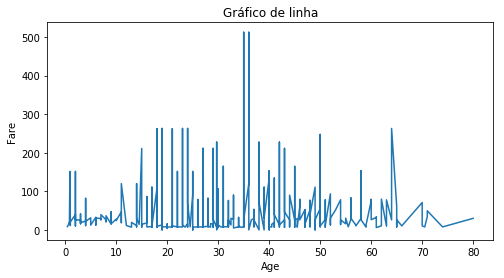

In [4]:
result = df.sort_values(by=['Age'])

plt.figure(figsize=(8,4))

plt.plot(result['Age'],result['Fare'])

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Gráfico de linha")

plt.show()

<h3>Gráfico de linha no seaborn</h3>

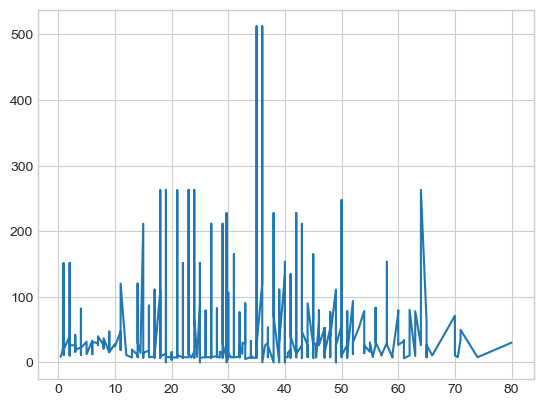

In [5]:
# gráfico da função de cumulação
plt.rcdefaults()

sns.set_style("whitegrid")

plt.plot(result['Age'],result['Fare'])
plt.show()

Muito parecido com o gráfico de linha, existe o gráfico de ponto para visualização de padrões em dados categóricos.

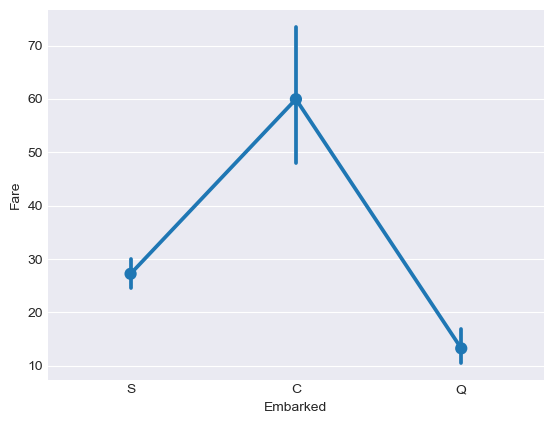

In [6]:
plt.rcdefaults()

sns.set_style("darkgrid")

ax = sns.pointplot(x="Embarked", y="Fare", data=df)

plt.show()

<h3>Gráfico de linha no Bokeh</h3>

Loading BokehJS ...

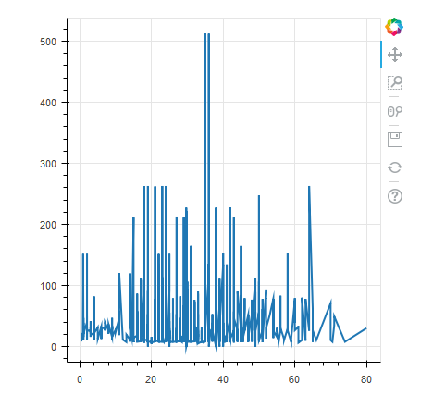

In [7]:
output_notebook()

p = figure(plot_width=400, plot_height=400)

# add a line renderer
p.line(result['Age'], result['Fare'], line_width=2)

# in your computer just
# show(p)

# just for display in github
export_png(p, filename="bokeh_line.png")
img=mpimg.imread('bokeh_line.png')
plt.axis('off')
plt.imshow(img)

<h2>Gráfico de barras</h3>

<h3>Exemplos de gráficos de barra no matplotlib</h3>

Bom para visualizações de dados categóricos. No nosso dataset temos dois tipos de dados categóricos: Sex (sexo) e Embarked (Portão de embarque).

In [8]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

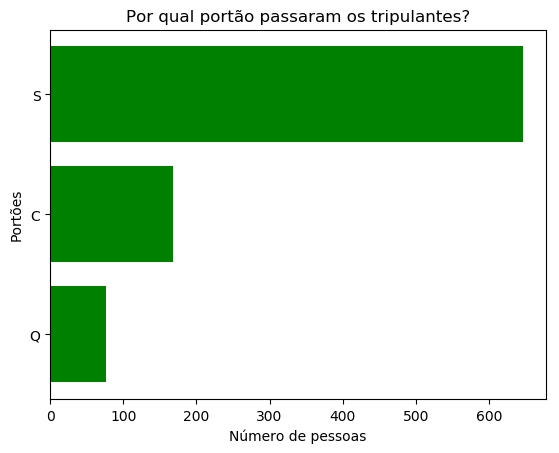

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
embarked = ('S', 'C', 'Q')
y_pos = np.arange(len(embarked))
performance = [646,168,77]

ax.barh(y_pos, performance, align='center',color='green')

ax.set_yticks(y_pos)
ax.set_yticklabels(embarked)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Número de pessoas')
ax.set_ylabel('Portões')
ax.set_title('Por qual portão passaram os tripulantes?')

plt.show()

Uma alternativa ao gráfico de barras é o gráfico de pizza.

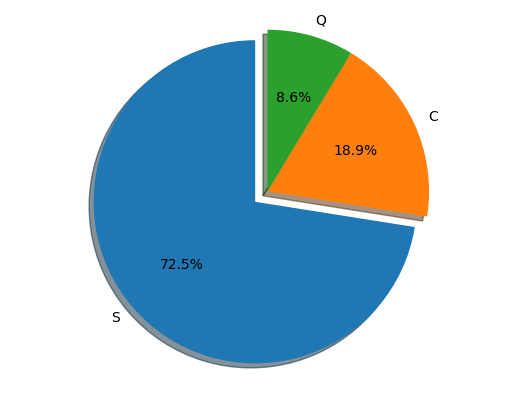

In [10]:
labels = ('S', 'C', 'Q')
sizes = [646,168,77]
explode = (0.1, 0, 0)  # only "explode" the 1nd slice (i.e. 'S')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

No próximo exemplo um gráfico de barra horizontal.

In [11]:
df[df['Sex']=='male']['Embarked'].value_counts()

S    441
C     95
Q     41
Name: Embarked, dtype: int64

In [12]:
df[df['Sex']=='female']['Embarked'].value_counts()

S    205
C     73
Q     36
Name: Embarked, dtype: int64

Como escolher as cores:<br/>
https://blog.graphiq.com/finding-the-right-color-palettes-for-data-visualizations-fcd4e707a283<br/>
http://colorhunt.co/

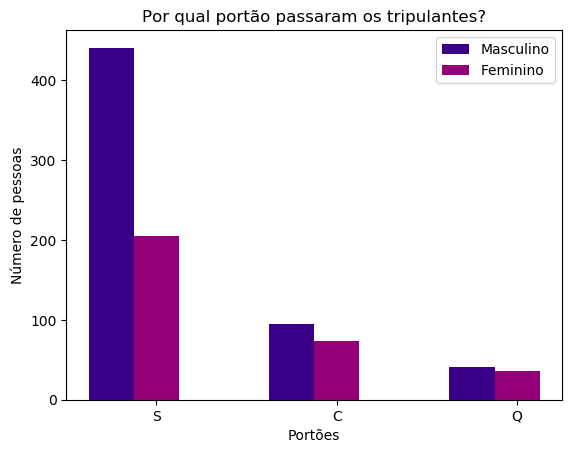

In [13]:
plt.rcdefaults()
fig, ax = plt.subplots()

x = np.arange(3)
males = [441,95,41]
females = [205,73,36]
width = 0.25

ax.bar(x, males, width, color='#3a0088', label="Masculino")
ax.bar(x + width, females, width, color='#930077', label="Feminino")

ax.set_xticks(x + width)
ax.set_xticklabels(['S', 'C', 'Q'])
ax.set_xlabel("Portões")
ax.set_ylabel("Número de pessoas")
ax.set_title("Por qual portão passaram os tripulantes?")
ax.legend(loc = 'upper right')

plt.show()

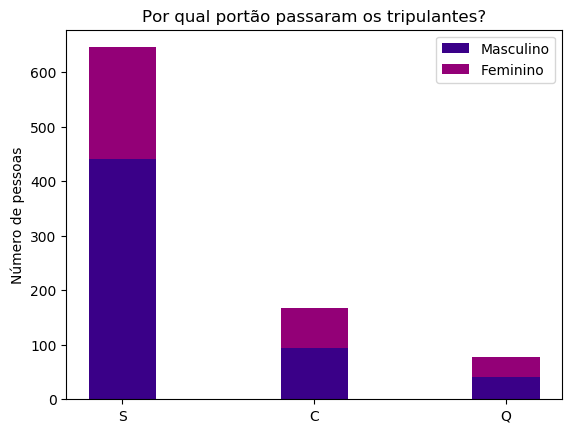

In [14]:
plt.rcdefaults()

N = 3
males = [441,95,41]
females = [205,73,36]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, males, width, color='#3a0088')
p2 = plt.bar(ind, females, width, color='#930077', bottom=males)

plt.ylabel('Número de pessoas')
plt.title('Por qual portão passaram os tripulantes?')
plt.xticks(ind, ('S', 'C', 'Q'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Masculino', 'Feminino'))

plt.show()

<h3>Exemplos de gráficos de barra no Seaborn</h3>

Fonte: https://seaborn.pydata.org/generated/seaborn.barplot.html

Observe que no próximo gráfico podemos visualizar 4 características do conjunto de dados simultaneamente, sendo 3 categóricas e uma inteira.

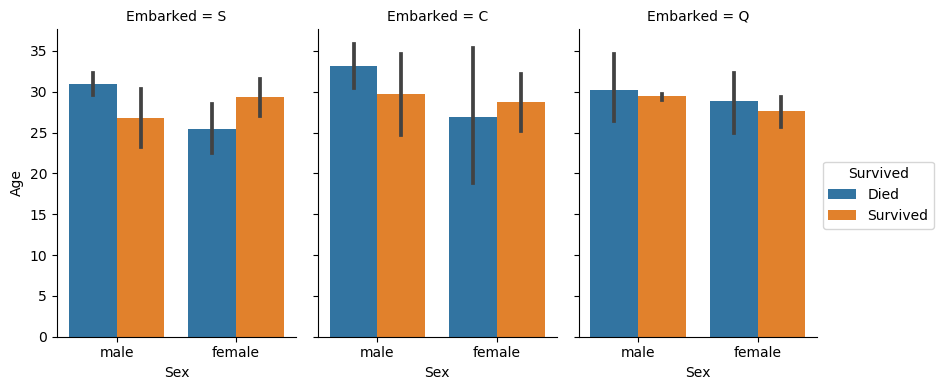

In [15]:
plt.rcdefaults()

g = sns.factorplot(
    x="Sex", 
    y="Age", 
    hue="Survived", 
    col="Embarked", 
    data=df, 
    kind="bar", 
    size=4, 
    aspect=.7)
plt.show()

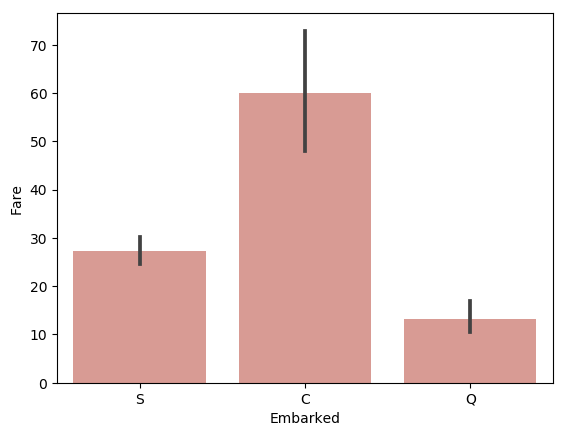

In [16]:
plt.rcdefaults()

ax = sns.barplot("Embarked", y="Fare", data=df, color="salmon", saturation=.5)
plt.show()

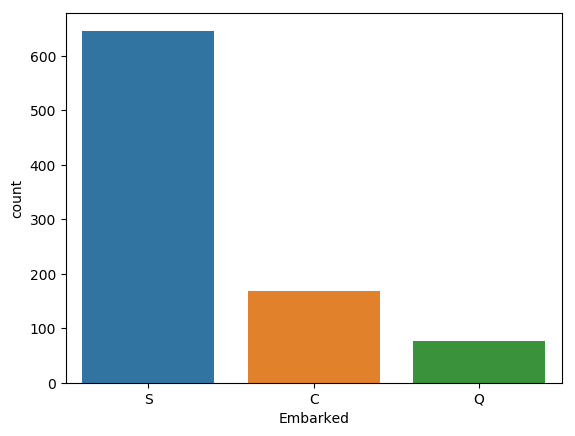

In [17]:
plt.rcdefaults()

ax = sns.countplot(
    x="Embarked",
    data=df[['Embarked']],
    order = df['Embarked'].value_counts().index)

plt.show()

<h3>Gráfico de barras no Bokeh</h3>

In [18]:
output_notebook()

Loading BokehJS ...

In [19]:
portoes = ['S', 'C', 'Q']
counts = [646,168,77]

source = ColumnDataSource(data=dict(portoes=portoes, counts=counts, color=['#e95280','#23b1a5','#ffdd7e']))

p = figure(x_range=portoes, y_range=(0,700), plot_height=350, title="Por qual portão passaram os tripulantes?",
           toolbar_location=None, tools="")

p.vbar(x='portoes', top='counts', width=0.9, color='color', legend="portoes", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

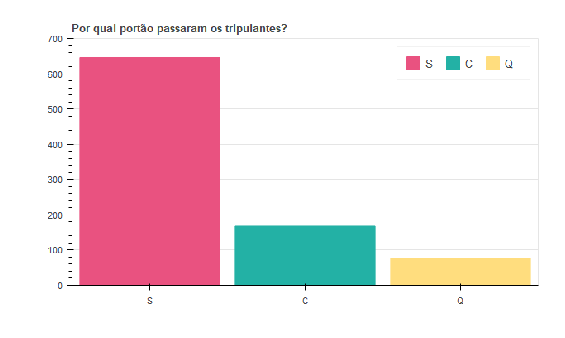

In [20]:
# just for display in github
export_png(p, filename="bokeh_bar.png")
img=mpimg.imread('bokeh_bar.png')
plt.axis('off')
plt.imshow(img)

<h2>Gráficos de dispersão</h2>

<h3>Gráfico de dispersão com o matplotblib</h3>

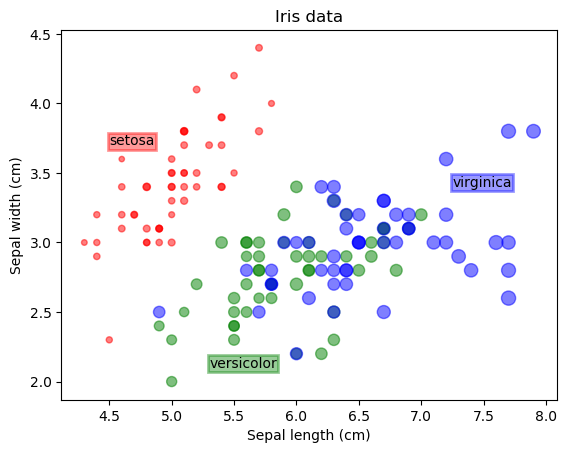

In [21]:
plt.rcdefaults()

colors = 50*['red']+50*['green']+50*['blue']
area = iris['petal length (cm)']*15

xdata = iris['sepal length (cm)']
ydata = iris['sepal width (cm)']

plt.scatter(x=xdata, y=ydata, s=area, c=colors, alpha=0.5)
plt.title('Iris data')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# anotações: https://matplotlib.org/users/annotations.html#annotating-with-text-with-box
bbox_props_setosa = dict(boxstyle="square,pad=0.1", fc="red", ec="r", lw=2, alpha=0.4)
plt.annotate('setosa',xy=(4.5,3.7),size=10,bbox=bbox_props_setosa)
bbox_props_virginica = dict(boxstyle="square,pad=0.1", fc="blue", ec="b", lw=2, alpha=0.4)
plt.annotate('virginica',xy=(7.25,3.4),size=10, bbox=bbox_props_virginica)
bbox_props_versicolor = dict(boxstyle="square,pad=0.1", fc="green", ec="g", lw=2, alpha=0.4)
plt.annotate('versicolor',xy=(5.3,2.1),size=10, bbox=bbox_props_versicolor)

plt.show()

<h3>Gráfico de dispersão com o Seaborn</h3>

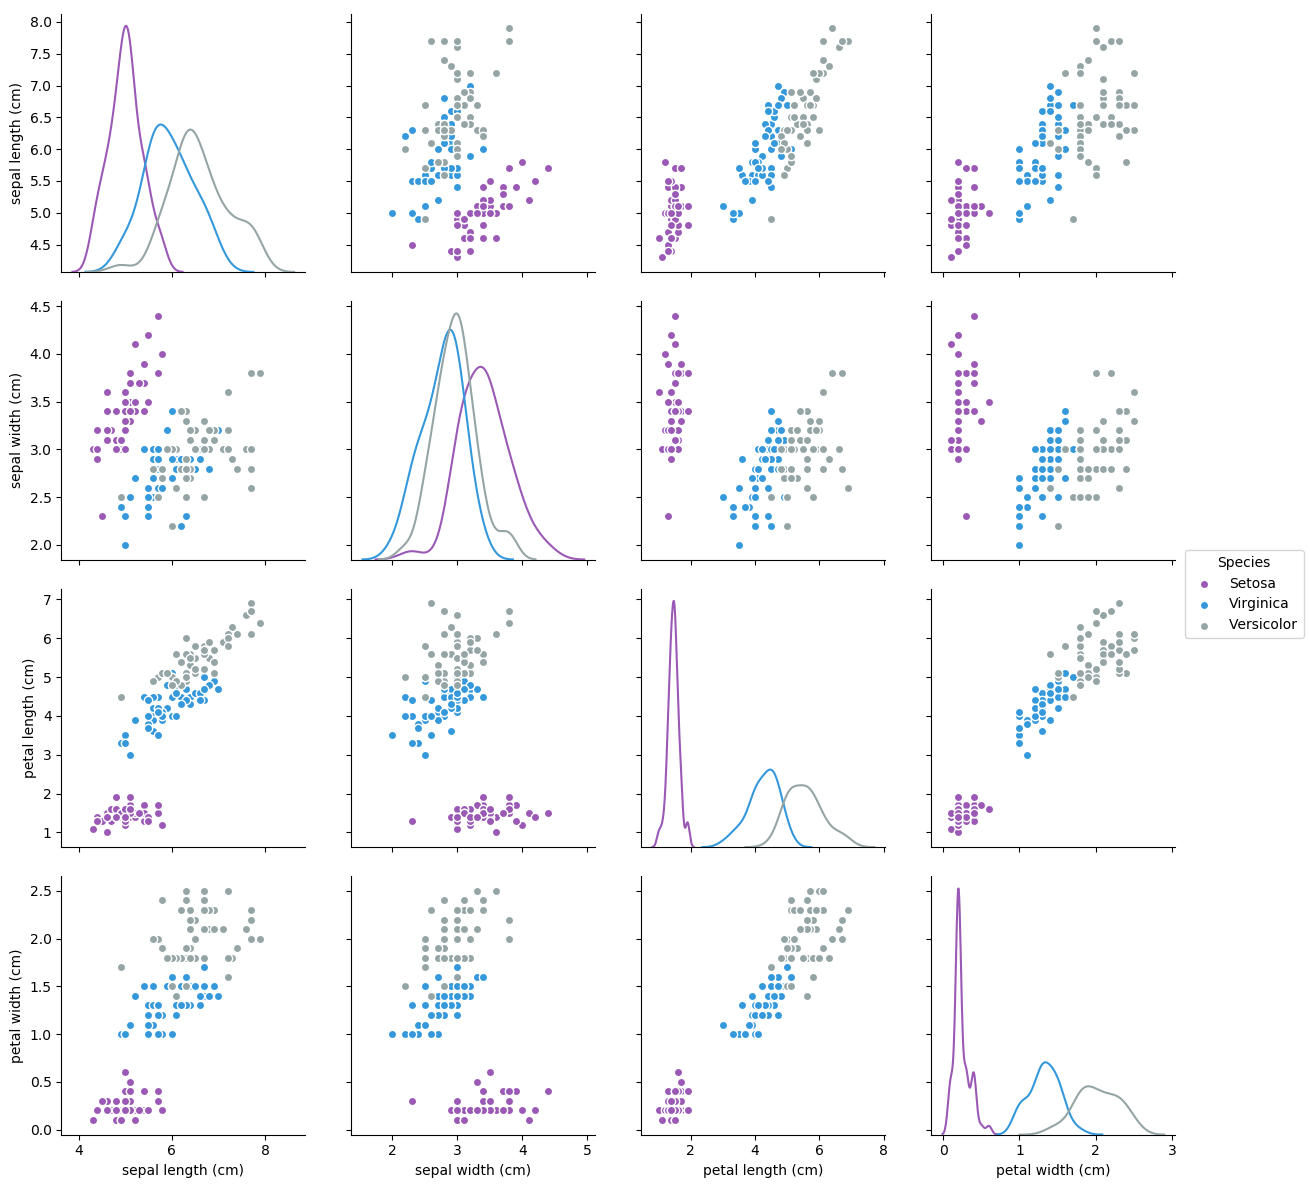

In [22]:
plt.rcdefaults()

iris['Species'] = 50*['Setosa'] + 50*['Virginica'] + 50*['Versicolor']

# Escolhendo as cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# criando gráfico para visualização de relações de 2 a 2 features
sns.pairplot(iris,
             hue='Species',
             palette=flatui,
             vars = [
                 'sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)'
             ],
             size=3,
             diag_kind="kde") # can be hist

plt.show()

Possível fazer gráficos já com regressão linear:

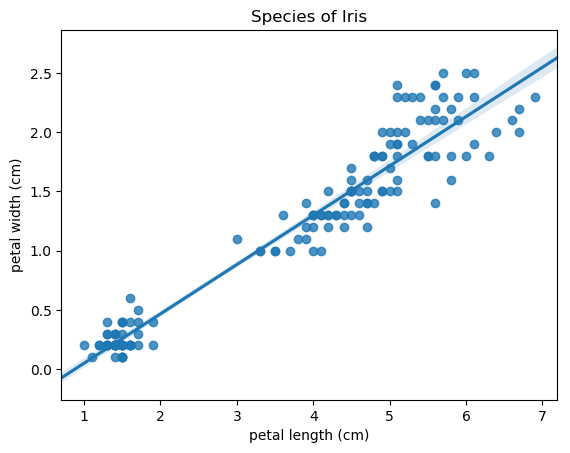

In [23]:
ax = sns.regplot(x="petal length (cm)", y="petal width (cm)", data=iris)
ax.set_title("Species of Iris")
plt.show()

<h3>Gráfico de Dispersão no Bokeh</h3>

In [24]:
output_notebook()

Loading BokehJS ...

In [25]:
p = figure(title="Gráfico de dispersão: Idade vs Tarifa",
           x_axis_label='Idade',
           y_axis_label='Tarifa')

p.circle(df['Age'],df['Fare'],fill_alpha=0.6,line_color=None)

GlyphRenderer(id='5cdb7d3d-1e9d-4bec-8c53-5a5149be8a6d', ...)

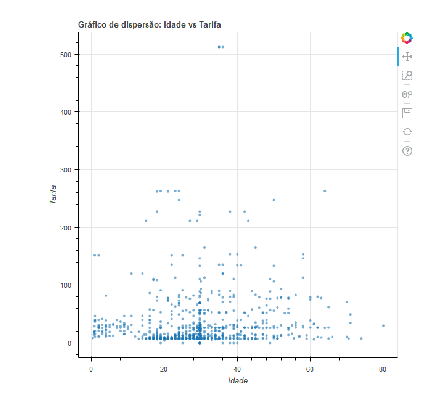

In [26]:
# just for display in github
export_png(p, filename="bokeh_scatter1.png")
img=mpimg.imread('bokeh_scatter1.png')
plt.axis('off')
plt.imshow(img)

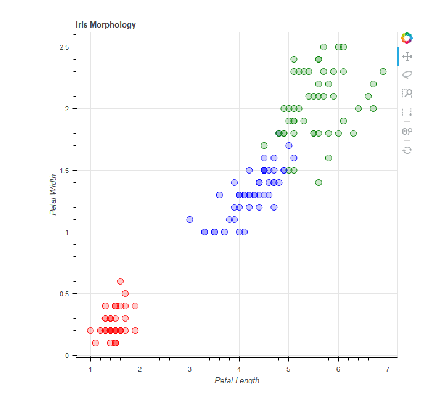

In [27]:
colormap = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}
iris['color'] = iris['Species'].map(lambda x: colormap[x])

p = figure(title = "Iris Morphology", tools='box_select,lasso_select,pan,wheel_zoom,box_zoom,reset')
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(iris["petal length (cm)"],
         iris["petal width (cm)"],
         color=iris["color"],
         selection_color='#9b59b6',
         nonselection_fill_alpha=0.2,
         nonselection_fill_color='grey',
         fill_alpha=0.2,
         size=10)

# just for display in github
export_png(p, filename="bokeh_scatter2.png")
img=mpimg.imread('bokeh_scatter2.png')
plt.axis('off')
plt.imshow(img)

<h2>Histogramas</h2>

<h3>Histogramas no matplotlib</h3>

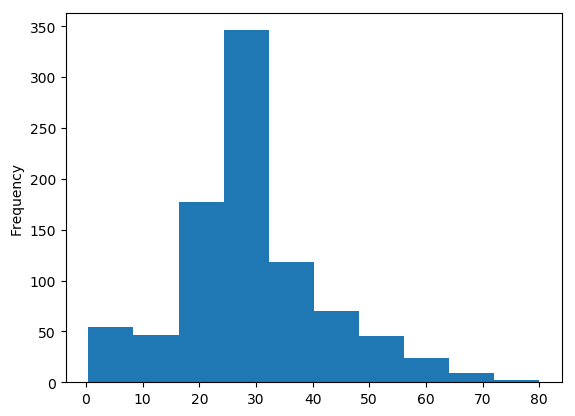

In [28]:
plt.rcdefaults()

# a simple way
df['Age'].plot(kind='hist')
plt.show()

In [29]:
mu, sigma = np.mean(df['Age']), np.std(df['Age'])
print(mu, sigma)

29.699117647058763 12.994716872789033


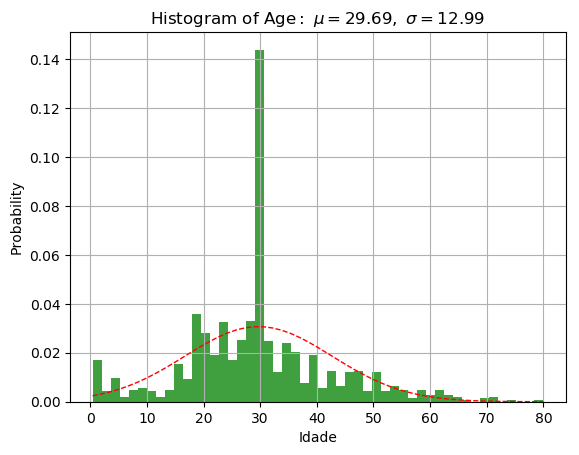

In [30]:
plt.rcdefaults()

x = df['Age']

# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Idade')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age:}\ \mu=29.69,\ \sigma=12.99$')
plt.grid(True)

plt.show()

<h3>Histogramas no Seaborn</h3>

Fonte: https://seaborn.pydata.org/tutorial/distributions.html

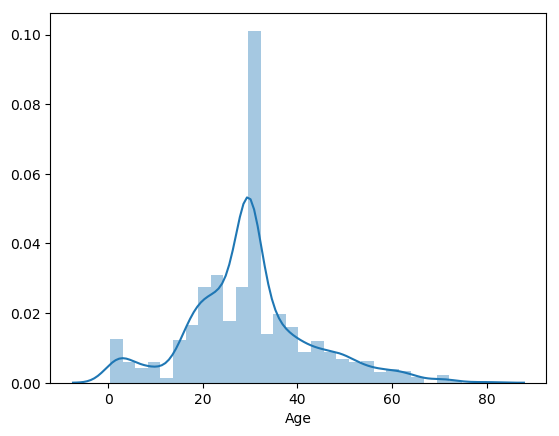

In [31]:
plt.rcdefaults()

sns.distplot(df['Age'])
plt.show()

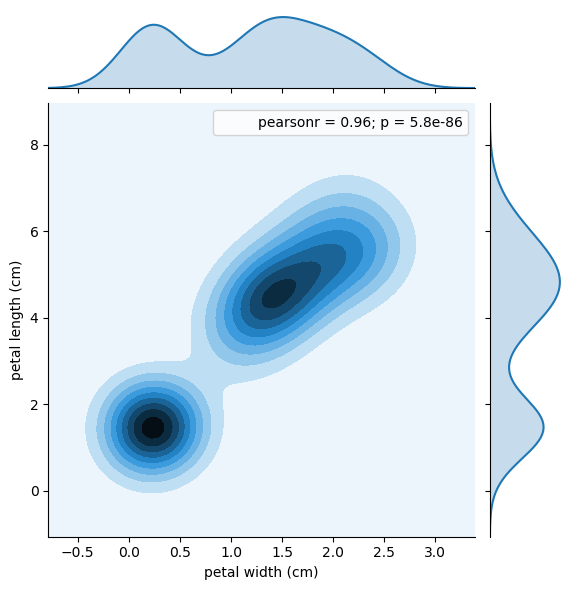

In [32]:
sns.jointplot(x="petal width (cm)", y="petal length (cm)", data=iris, kind="kde")
plt.show()

<h3>Histogramas no bokeh</h3>

Fonte: https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html

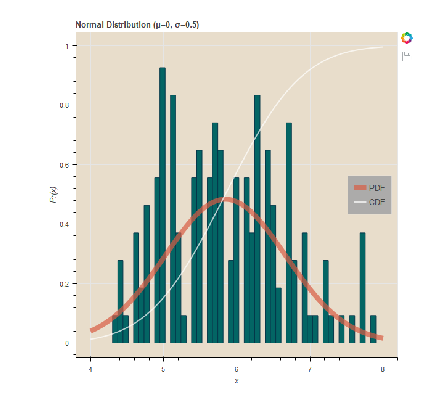

In [33]:
p = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = np.mean(iris['sepal length (cm)']), np.std(iris['sepal length (cm)'])

iris_sepal_length = iris['sepal length (cm)']
hist, edges = np.histogram(iris_sepal_length, density=True, bins=50)

x = np.linspace(4, 8, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p.legend.location = "center_right"
p.legend.background_fill_color = "darkgrey"
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'

# just for display in github
export_png(p, filename="bokeh_hist.png")
img=mpimg.imread('bokeh_hist.png')
plt.axis('off')
plt.imshow(img)

<h2>BoxPlot</h2>

<img src='boxplot.png'></img>
Fonte: https://biostats.w.uib.no/9-how-to-draw-a-boxplot/

<h3>Boxplot no matplotlib</h3>

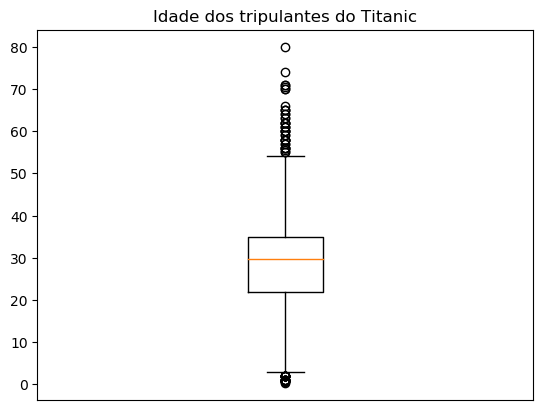

In [34]:
plt.rcdefaults()

plt.boxplot(df['Age'])
plt.title("Idade dos tripulantes do Titanic")

# remove xticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.show()

<h3>Boxplot no Seaborn</h3>

Fonte: https://seaborn.pydata.org/generated/seaborn.boxplot.html

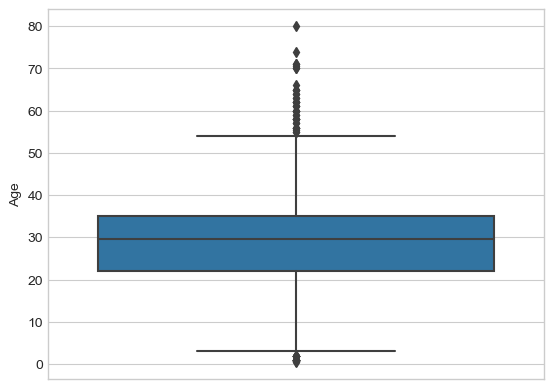

In [35]:
plt.rcdefaults()

sns.set_style("whitegrid")

ax = sns.boxplot(y=df["Age"])
plt.show()

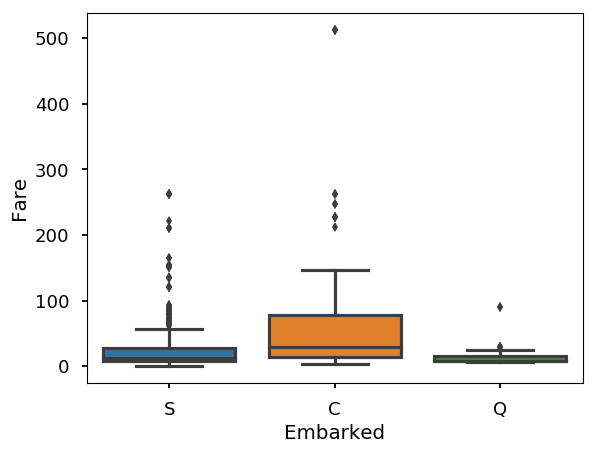

In [36]:
plt.rcdefaults()

sns.set_context("talk")

ax = sns.boxplot(x="Embarked", y="Fare", data=df)

plt.show()

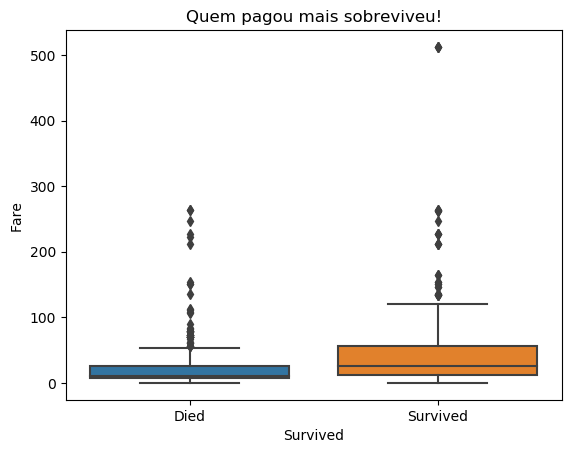

In [37]:
plt.rcdefaults()

ax = sns.boxplot(x="Survived", y="Fare", data=df)
ax.set_title("Quem pagou mais sobreviveu!")

plt.show()

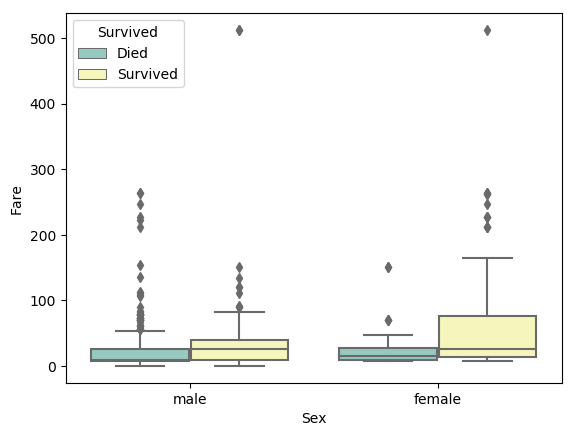

In [38]:
plt.rcdefaults()

ax = sns.boxplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set3")

plt.show()

Violin e swarm plots também são boas alternativas.

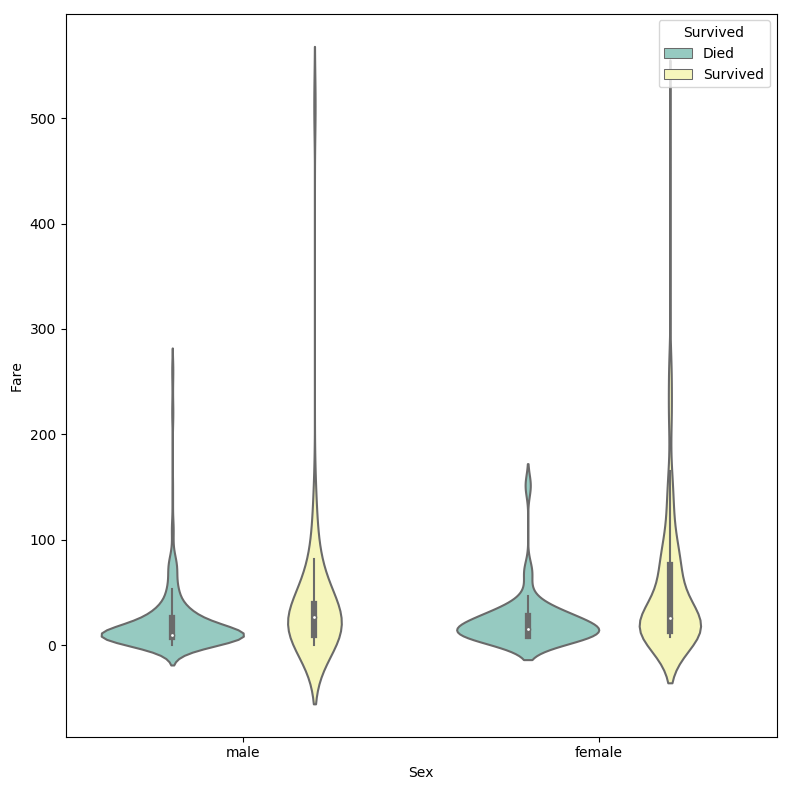

In [39]:
# violin plot
plt.rcdefaults()

plt.figure(figsize=(8,8))

sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set3")

plt.tight_layout() 
plt.show()

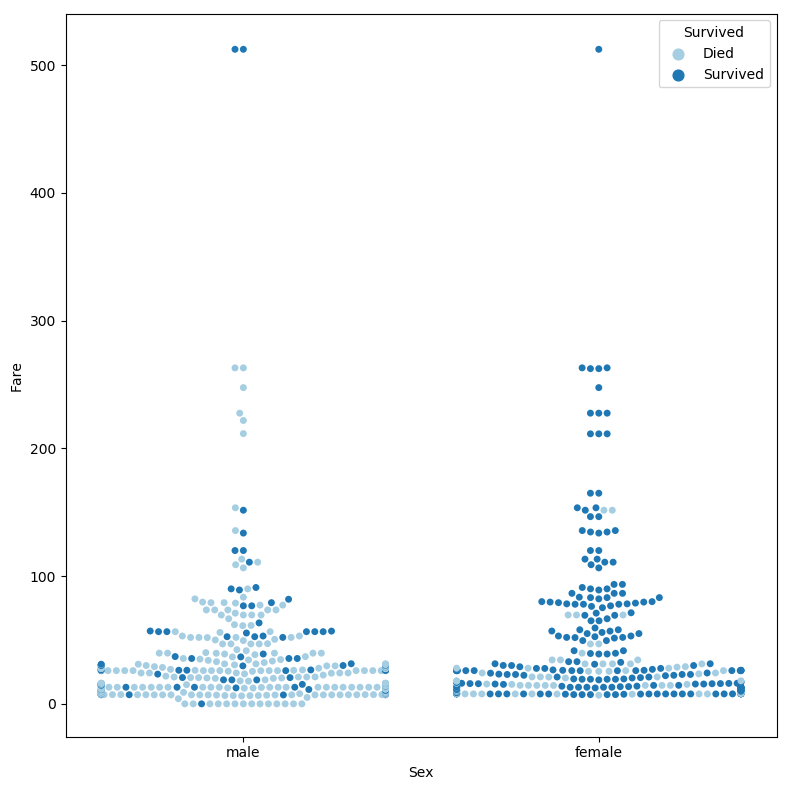

In [40]:
# swarm plot
plt.rcdefaults()

plt.figure(figsize=(8,8))

sns.set_palette("Paired")

sns.swarmplot(x="Sex", y="Fare", hue="Survived", data=df)

plt.tight_layout() 
plt.show()

<h3>Boxplot no Bokeh</h3>

Não é uma boa ideia!!! 

<h2>Outros tipos de gráficos</h2>

<h3>Mosaic plot</h3>

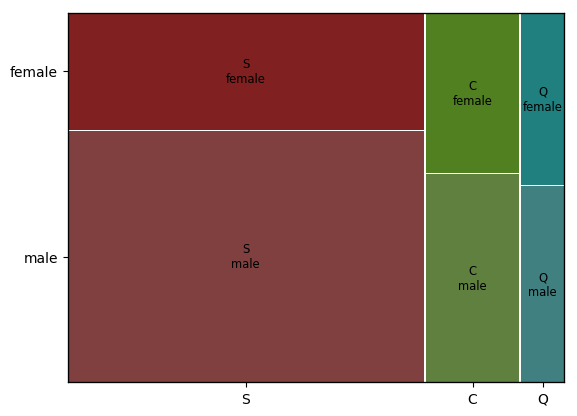

In [41]:
mosaic(df, ['Embarked', 'Sex'])
plt.show()

<h3>Heatmap</h3>

<h3>Criando tabelas cruzadas</h3>

In [42]:
myCrosstable = pd.crosstab(df['Embarked'], df['Sex'])
myCrosstable

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,205,441


In [43]:
myCrosstable.values

array([[ 73,  95],
       [ 36,  41],
       [205, 441]], dtype=int64)

In [44]:
myCrosstable.index

Index(['C', 'Q', 'S'], dtype='object', name='Embarked')

In [45]:
myCrosstable.columns

Index(['female', 'male'], dtype='object', name='Sex')

<h3>Tabelas cruzadas com funções</h3>

In [46]:
# porcentagem
perc_crosstab = pd.crosstab(df['Embarked'], df['Sex']).apply(lambda r: r/r.sum(), axis=1)
perc_crosstab

Sex,female,male
Embarked,,
C,0.434524,0.565476
Q,0.467532,0.532468
S,0.317337,0.682663


In [47]:
# correlation
corr_crosstab = iris.corr()
corr_crosstab

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


In [48]:
# mean 
mean_crosstab = pd.pivot_table(df, values='Fare', index=['Sex', 'Embarked'],columns=['Survived'], aggfunc=np.mean)
mean_crosstab

Survived              Died   Survived
Sex    Embarked                      
female C         16.215278  83.460286
       Q         10.904633  13.211733
       S         25.728508  45.095158
male   C         38.065342  71.468545
       Q         13.911732  12.916667
       S         19.881281  30.366286

In [49]:
# mean 
mean_crosstab_sex_embarked = pd.pivot_table(df, values='Fare', index=['Embarked'],columns=['Sex'], aggfunc=np.mean)
mean_crosstab_sex_embarked

Sex,female,male
Embarked,,
C,75.169805,48.262109
Q,12.634958,13.838922
S,39.143456,21.711996


<h3>Heatmap com Seaborn</h3>

Fonte: https://seaborn.pydata.org/generated/seaborn.heatmap.html

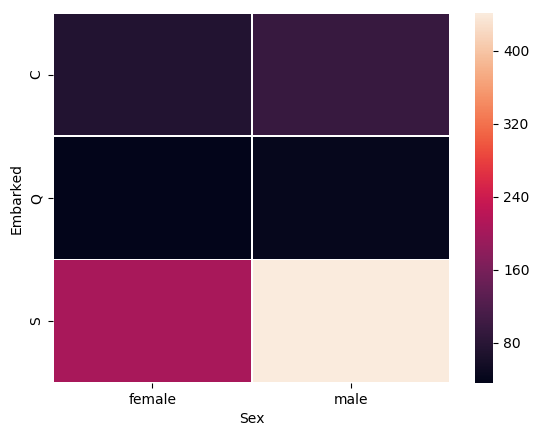

In [50]:
plt.rcdefaults()

ax = sns.heatmap(myCrosstable, linewidths=.5)
plt.show()

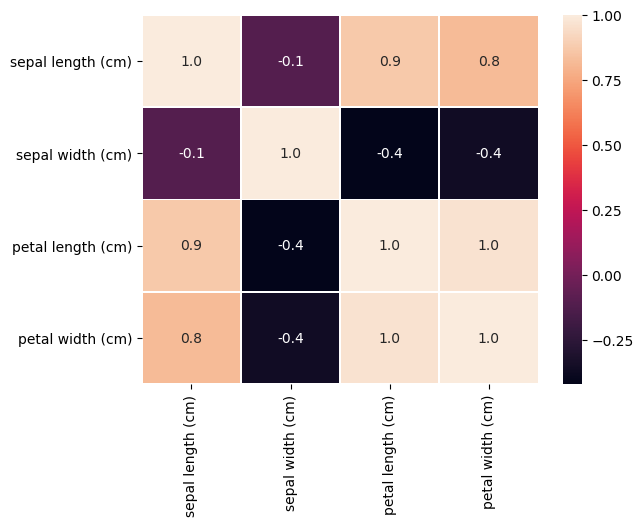

In [51]:
# heatmap of correlations
corr = iris.corr()
sns.heatmap(corr,
            linewidths=.5,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".1f")
plt.show()

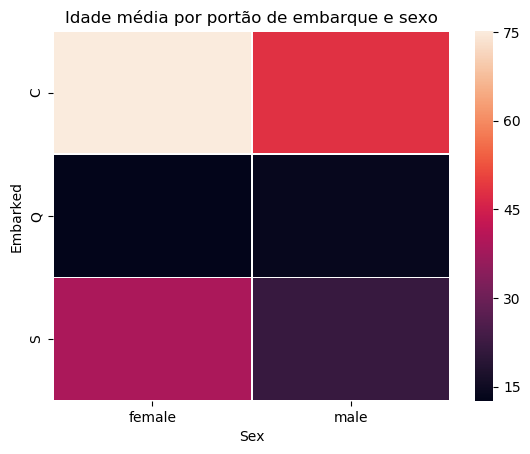

In [52]:
plt.rcdefaults()

ax = sns.heatmap(mean_crosstab_sex_embarked, linewidths=.5 )
# cmap can be "BuPu" "Blues" "YlGnBu" "Greens"
ax.set_title("Idade média por portão de embarque e sexo")
plt.show()

<h3>Chord</h3>

O que é:<br/>
http://circos.ca/presentations/articles/vis_tables1/<br/>
https://www.visualcinnamon.com/2015/08/stretched-chord.html

Criando grafos com networkx:

In [53]:
import networkx as nx

# criando o grafo
G = nx.Graph() # para orientados usar G = nx.DiGraph(), G = nx.MultiGraph()

# adicionando nós
G.add_nodes_from(list(range(101)))
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [54]:
G.add_edge(1,2)
G.edges

EdgeView([(1, 2)])

In [55]:
import random
E = []
for i in range(30):
    x = random.randint(1,51)
    y = random.randint(1,51)
    E.append((x,y))

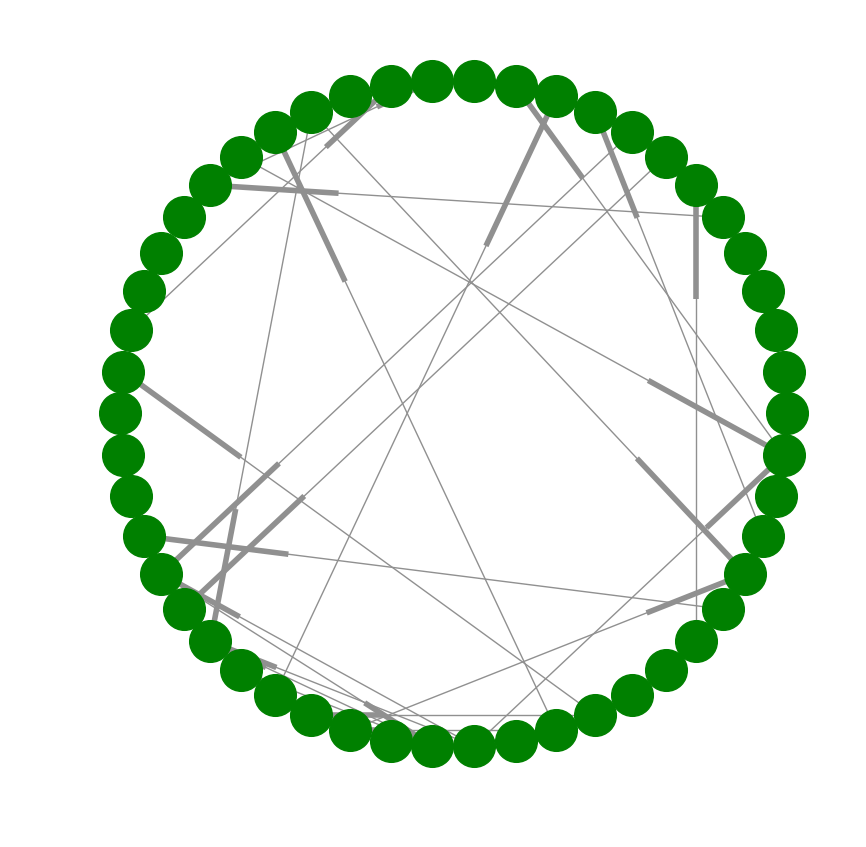

In [56]:
G=nx.DiGraph()
G.add_nodes_from(range(1,51))
G.add_edges_from(E)

plt.figure(figsize=(8,8))            
nx.draw_circular(G,node_color='g', edge_color='#909090', node_size=900)
plt.axis('equal')
plt.show()

<h3>Colormap</h3>

Possíveis fontes:<br/>
https://yangtavares.com/2017/10/22/analyzing-the-state-of-the-basic-health-units-of-brazil-ubs-using-python-for-data-science/<br/>
https://www.kaggle.com/tonionca/terrorist-attacks-in-brazil-1970-2015<br/>
https://ocefpaf.github.io/python4oceanographers/blog/2013/08/12/brazil-states-map/

Ainda estou estudando essa parte, que tal contribuir com esse projeto? ¯\\(ツ)/¯

<h2>Vários gráficos juntos numa mesma figura</h2>

<h3>Matplotlib e Seaborn</h3>

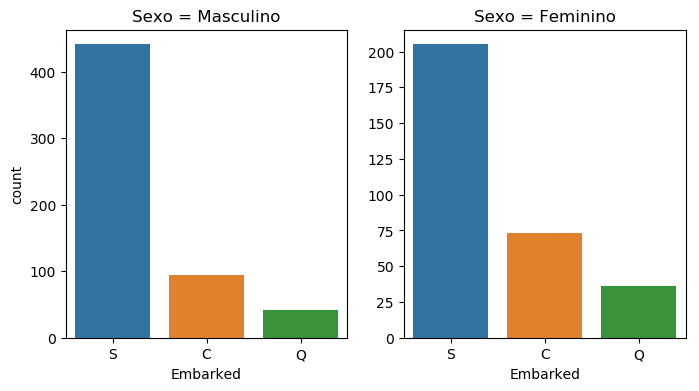

In [57]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='Embarked', data=df[df['Sex']=='male'][['Embarked']],order = df['Embarked'].value_counts().index)
ax1.set_title("Sexo = Masculino")
plt.subplot(1,2,2)
ax2 = sns.countplot(x="Embarked", data=df[df['Sex']=='female'][['Embarked']],order = df['Embarked'].value_counts().index)
ax2.set_title("Sexo = Feminino")
ax2.set_ylabel("")
plt.show()

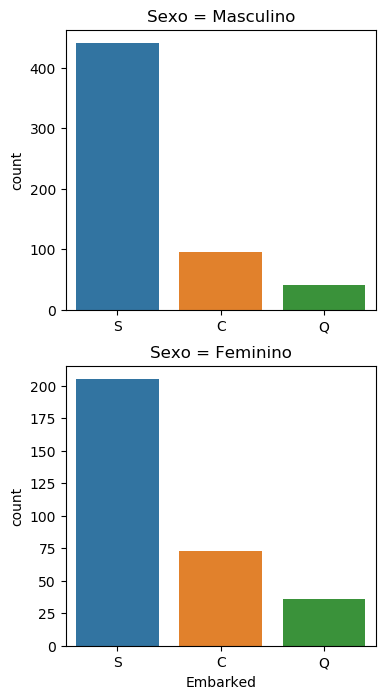

In [58]:
plt.figure(figsize=(4,8))
plt.subplot(2,1,1)
ax1 = sns.countplot(x='Embarked', data=df[df['Sex']=='male'][['Embarked']],order = df['Embarked'].value_counts().index)
ax1.set_title("Sexo = Masculino")
ax1.set_xlabel("")
plt.subplot(2,1,2)
ax2 = sns.countplot(x="Embarked", data=df[df['Sex']=='female'][['Embarked']],order = df['Embarked'].value_counts().index)
ax2.set_title("Sexo = Feminino")
plt.show()

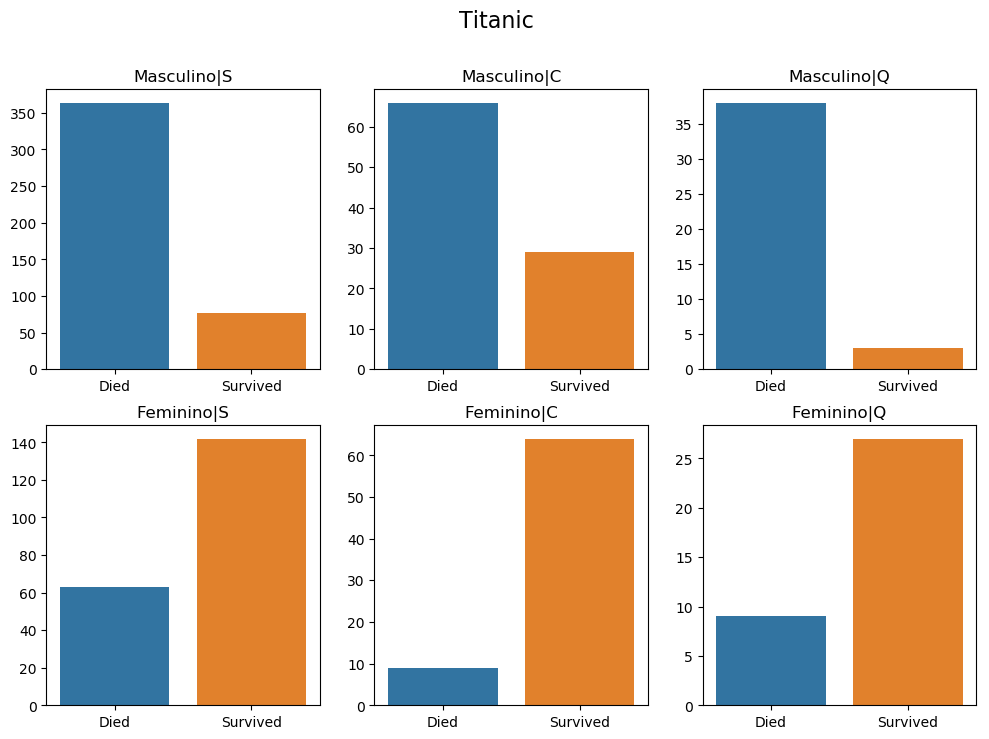

In [59]:
f = plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
ax1 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'S' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax1.set_title("Masculino|S")
ax1.set_xlabel("")
ax1.set_ylabel("")
plt.suptitle('Titanic', fontsize=16)

plt.subplot(2,3,2)
ax2 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'C' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax2.set_title("Masculino|C")
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.subplot(2,3,3)
ax3 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'Q' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax3.set_title("Masculino|Q")
ax3.set_xlabel("")
ax3.set_ylabel("")

plt.subplot(2,3,4)
ax4 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'S' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax4.set_title("Feminino|S")
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.subplot(2,3,5)
ax5 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'C' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax5.set_title("Feminino|C")
ax5.set_xlabel("")
ax5.set_ylabel("")

plt.subplot(2,3,6)
ax6 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'Q' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax6.set_title("Feminino|Q")
ax6.set_xlabel("")
ax6.set_ylabel("")

plt.show()

<h3>Bokeh</h3>

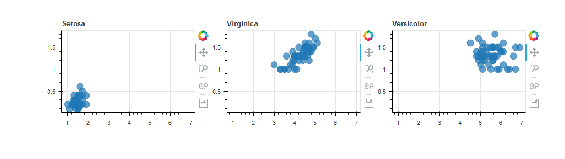

In [60]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

layout = row(p1, p2, p3)

# just for display in github
export_png(layout, filename="bokeh_row.png")
img=mpimg.imread('bokeh_row.png')
plt.axis('off')
plt.imshow(img)

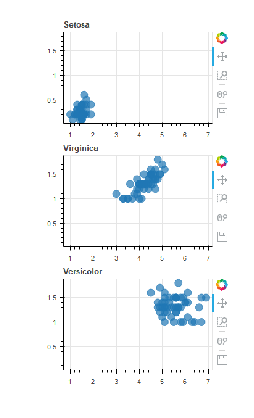

In [61]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

layout = column(p1, p2, p3)

# just for display in github
export_png(layout, filename="bokeh_column.png")
img=mpimg.imread('bokeh_column.png')
plt.axis('off')
plt.imshow(img)

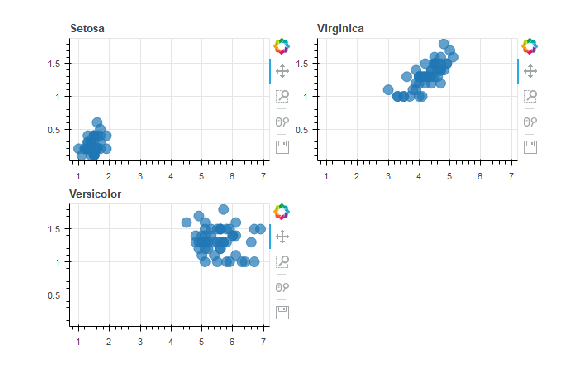

In [62]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

layout = column(row(p1, p2), p3)

# just for display in github
export_png(layout, filename="bokeh_row_column.png")
img=mpimg.imread('bokeh_row_column.png')
plt.axis('off')
plt.imshow(img)

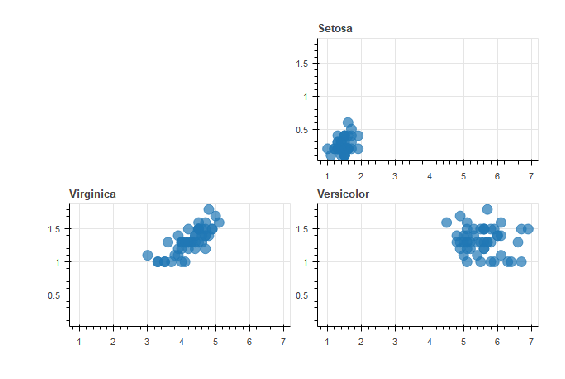

In [63]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range


layout = gridplot([[None, p1], [p2, p3]], toolbar_location=None)

# just for display in github
export_png(layout, filename="bokeh_gridplot.png")
img=mpimg.imread('bokeh_gridplot.png')
plt.axis('off')
plt.imshow(img)

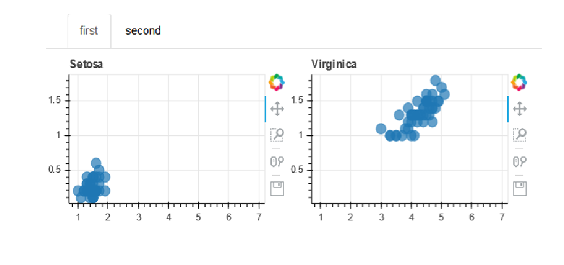

In [64]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

first = Panel(child=row(p1, p2), title='first')
second = Panel(child=row(p3), title='second')
# Put the Panels in a Tabs object
tabs = Tabs(tabs=[first, second])

# just for display in github
#export_png(tabs, filename="bokeh_tabs.png")
img=mpimg.imread('bokeh_tabs.png')
plt.axis('off')
plt.imshow(img)